In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np
import os
import glob
import cv2

In [2]:
DATA_DIR = "D:\\Data\\Dispertech\\2020-01-27"

In [23]:
for file in glob.glob(os.path.join(DATA_DIR, '*.npy')):
    filename = file.split('\\')[-1]
    data = np.load(file)
    fig, ax = plt.subplots(figsize=(11,10), dpi=100)
    plt.imshow(data.T)
    plt.title(filename)
    plt.savefig(file+'.png')
    plt.close()

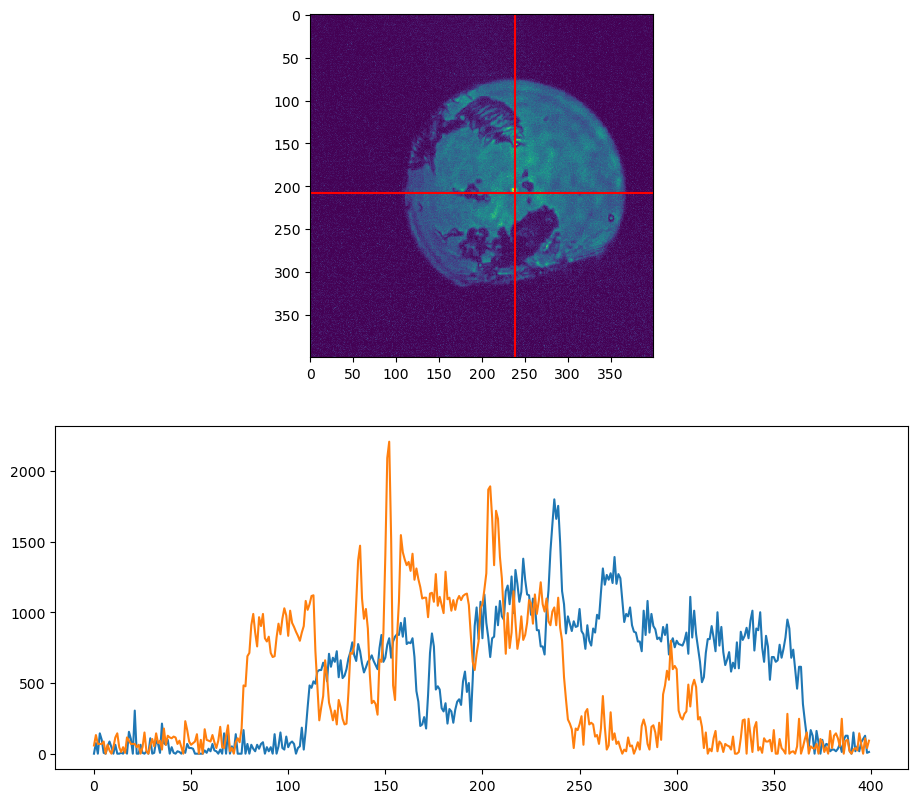

In [83]:
file = "fiber_end_1902060_0.npy"
filename = os.path.join(DATA_DIR,file)
data = np.load(os.path.join(DATA_DIR, filename))[450:850, 450:850]
# test_img = mask*np.ones(data.shape, dtype=np.uint8)*2**8
circles = cv2.HoughCircles(np.uint8(data),cv2.HOUGH_GRADIENT,10,50,param1=50,param2=30,minRadius=100,maxRadius=0)
fig, ax = plt.subplots(2, figsize=(11,10), dpi=100)
fig.set()
y = 208
x = 238
ax[0].imshow(data.T)
ax[0].axhline(y=y,color='red')
ax[0].axvline(x=x,color='red')
ax[1].plot(data[:,y])
ax[1].plot(data[x,:])

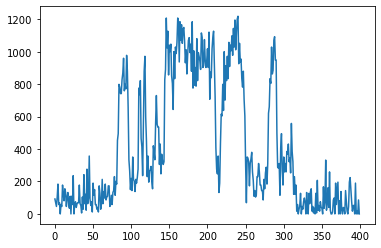

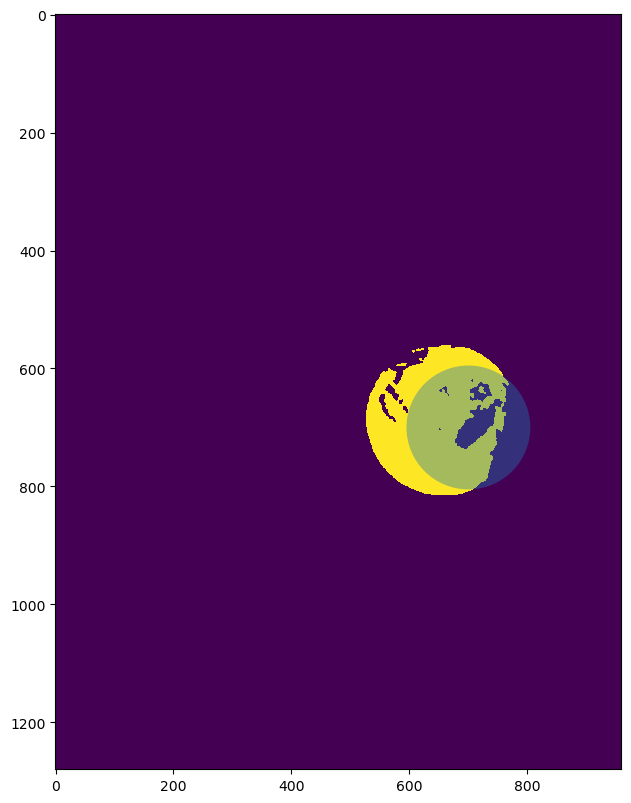

In [59]:
img = np.load(os.path.join(DATA_DIR, filename))
img = gaussian(img, sigma=2)
mask = img>.005
d = np.zeros(img.shape, dtype=np.uint8)
d[mask] = 255
# d = gaussian(d, sigma=2)    
fig, ax = plt.subplots(figsize=(11,10), dpi=100)
plt.imshow(d)
circles = cv2.HoughCircles(d,cv2.HOUGH_GRADIENT,200,500,param1=50,param2=50,minRadius=45,maxRadius=350)
for c in circles[0, :]:
    circ = Circle((c[0],c[1]),c[2], alpha=0.4, facecolor=None)
    ax.add_patch(circ)

In [5]:
from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte
from skimage.filters import gaussian

In [30]:
img = np.load(os.path.join(DATA_DIR, filename))
image = img_as_ubyte(img)
mask = img>130
d = np.zeros(img.shape, dtype=np.uint8)
d[mask] = 255
d = gaussian(d)
plt.imshow(d)

NameError: name 'im' is not defined

(array([1.180892e+06, 6.246000e+03, 5.836000e+03, 6.191000e+03,
        1.336600e+04, 1.169200e+04, 3.823000e+03, 6.820000e+02,
        5.500000e+01, 1.700000e+01]),
 array([9.56987450e-05, 2.61656553e-03, 5.13743231e-03, 7.65829909e-03,
        1.01791659e-02, 1.27000326e-02, 1.52208994e-02, 1.77417662e-02,
        2.02626330e-02, 2.27834998e-02, 2.53043666e-02]),
 <a list of 10 Patch objects>)

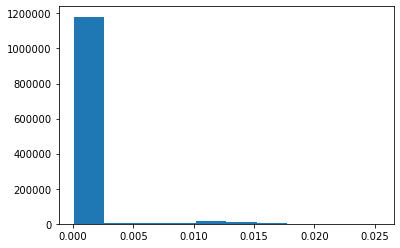

In [35]:
plt.hist(img.reshape(1228800,1))